<a href="https://colab.research.google.com/github/Souza172890/Teste_Tecnico/blob/main/Q1_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas necessárias
import pandas as pd 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#acessando os dados das estações (dados001)
original001 = 'https://apitempo.inmet.gov.br/estacoes/T'
dados001 = requests.get(original001)
dados001 = dados001.json()
dados001

[{'CD_DISTRITO': ' 04',
  'CD_ESTACAO': 'A422',
  'CD_OSCAR': '0-2000-0-86765',
  'CD_SITUACAO': 'Pane',
  'CD_WSI': '0-76-0-2906907000000408',
  'DC_NOME': 'ABROLHOS',
  'DT_FIM_OPERACAO': None,
  'DT_INICIO_OPERACAO': '2008-07-20T21:00:00.000-03:00',
  'FL_CAPITAL': 'N',
  'SG_ENTIDADE': 'INMET',
  'SG_ESTADO': 'BA',
  'TP_ESTACAO': 'Automatica',
  'VL_ALTITUDE': '20.93',
  'VL_LATITUDE': '-17.96305555',
  'VL_LONGITUDE': '-38.70333333'},
 {'CD_DISTRITO': ' 03',
  'CD_ESTACAO': 'A360',
  'CD_OSCAR': '0-2000-0-81755',
  'CD_SITUACAO': 'Pane',
  'CD_WSI': '0-76-0-2300200000000446',
  'DC_NOME': 'ACARAU',
  'DT_FIM_OPERACAO': None,
  'DT_INICIO_OPERACAO': '2009-04-21T21:00:00.000-03:00',
  'FL_CAPITAL': 'N',
  'SG_ENTIDADE': 'INMET',
  'SG_ESTADO': 'CE',
  'TP_ESTACAO': 'Automatica',
  'VL_ALTITUDE': '67.15',
  'VL_LATITUDE': '-3.1211111',
  'VL_LONGITUDE': '-40.08722221'},
 {'CD_DISTRITO': ' 06',
  'CD_ESTACAO': 'A657',
  'CD_OSCAR': '0-2000-0-86827',
  'CD_SITUACAO': 'Operante',
  'CD

In [3]:
#gerando um dataframe
df001 =pd.json_normalize(dados001)
df001.head()

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
0,0-2000-0-86765,ABROLHOS,N,None,Pane,Automatica,-17.96305555,0-76-0-2906907000000408,04,20.93,BA,INMET,A422,-38.70333333,2008-07-20T21:00:00.000-03:00
1,0-2000-0-81755,ACARAU,N,None,Pane,Automatica,-3.1211111,0-76-0-2300200000000446,03,67.15,CE,INMET,A360,-40.08722221,2009-04-21T21:00:00.000-03:00
2,0-2000-0-86827,AFONSO CLAUDIO,None,None,Operante,Automatica,-20.10416666,0-76-0-3200102000000478,06,507.48,ES,INMET,A657,-41.10694444,2011-09-23T21:00:00.000-03:00
3,0-2000-0-86686,AGUA BOA,N,None,Pane,Automatica,-14.01638888,0-76-0-5100201000000157,09,440,MT,INMET,A908,-52.21166666,2006-12-15T21:00:00.000-03:00
4,0-2000-0-86812,AGUA CLARA,N,None,Operante,Automatica,-20.44444444,0-76-0-5000203000000463,07,323.63,MS,INMET,A756,-52.87583332,2010-08-13T21:00:00.000-03:00


In [4]:
#verificando o tamanho do dataset
df001.shape

(607, 15)

In [5]:
#informaçãoes gerais sobre o dado
df001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CD_OSCAR            540 non-null    object
 1   DC_NOME             607 non-null    object
 2   FL_CAPITAL          495 non-null    object
 3   DT_FIM_OPERACAO     0 non-null      object
 4   CD_SITUACAO         607 non-null    object
 5   TP_ESTACAO          607 non-null    object
 6   VL_LATITUDE         607 non-null    object
 7   CD_WSI              570 non-null    object
 8   CD_DISTRITO         607 non-null    object
 9   VL_ALTITUDE         589 non-null    object
 10  SG_ESTADO           607 non-null    object
 11  SG_ENTIDADE         607 non-null    object
 12  CD_ESTACAO          607 non-null    object
 13  VL_LONGITUDE        607 non-null    object
 14  DT_INICIO_OPERACAO  607 non-null    object
dtypes: object(15)
memory usage: 71.3+ KB


In [6]:
#verificando se há dados faltantes
df001.isnull().sum()

CD_OSCAR               67
DC_NOME                 0
FL_CAPITAL            112
DT_FIM_OPERACAO       607
CD_SITUACAO             0
TP_ESTACAO              0
VL_LATITUDE             0
CD_WSI                 37
CD_DISTRITO             0
VL_ALTITUDE            18
SG_ESTADO               0
SG_ENTIDADE             0
CD_ESTACAO              0
VL_LONGITUDE            0
DT_INICIO_OPERACAO      0
dtype: int64

In [7]:
#fazendo a descrição dos dados
df001.describe()

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
count,540,607,495,0,607,607,607,570,607,589,607,607,607,607,607
unique,540,604,1,0,2,1,607,570,11,577,27,2,607,606,482
top,0-2000-0-86760,SAO SIMAO,N,NaN,Operante,Automatica,-6.56194444,0-76-0-2407203000000167,08,35,MG,INMET,A351,-36.28638888,2016-11-30T21:00:00.000-03:00
freq,1,2,495,NaN,397,607,1,1,94,3,68,588,1,2,18


In [27]:
#acessando uma série de dados de 14 dias para uma estação específica
original002 = 'https://apitempo.inmet.gov.br/estacao/2019-12-01/2019-12-14/A255'
dados002 = requests.get(original002)
dados002 = dados002.json()
dados002

[{'CD_ESTACAO': 'A255',
  'CHUVA': '0',
  'DC_NOME': 'ZE DOCA',
  'DT_MEDICAO': '2019-12-01',
  'HR_MEDICAO': '0000',
  'PRE_INS': '1004.8',
  'PRE_MAX': '1004.8',
  'PRE_MIN': '1004',
  'PTO_INS': '22',
  'PTO_MAX': '22',
  'PTO_MIN': '21.5',
  'RAD_GLO': '0',
  'TEM_INS': '28.3',
  'TEM_MAX': '29.4',
  'TEM_MIN': '28.3',
  'TEM_SEN': '26.7',
  'UF': 'MA',
  'UMD_INS': '69',
  'UMD_MAX': '69',
  'UMD_MIN': '62',
  'VEN_DIR': '80',
  'VEN_RAJ': '9.9',
  'VEN_VEL': '4.3',
  'VL_LATITUDE': '-3.26916666',
  'VL_LONGITUDE': '-45.65111111'},
 {'CD_ESTACAO': 'A255',
  'CHUVA': '0',
  'DC_NOME': 'ZE DOCA',
  'DT_MEDICAO': '2019-12-01',
  'HR_MEDICAO': '0100',
  'PRE_INS': '1005.2',
  'PRE_MAX': '1005.2',
  'PRE_MIN': '1004.8',
  'PTO_INS': '22.4',
  'PTO_MAX': '22.4',
  'PTO_MIN': '22',
  'RAD_GLO': '0',
  'TEM_INS': '27.3',
  'TEM_MAX': '28.3',
  'TEM_MIN': '27.3',
  'TEM_SEN': '26',
  'UF': 'MA',
  'UMD_INS': '75',
  'UMD_MAX': '75',
  'UMD_MIN': '69',
  'VEN_DIR': '76',
  'VEN_RAJ': '8.4',

In [28]:
#gerando um dataframe
df002 =pd.json_normalize(dados002)
df002.head()

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,VEN_DIR,DT_MEDICAO,CHUVA,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,ZE DOCA,1004.8,26.7,-3.26916666,1004.8,MA,0,22,28.3,-45.65111111,62,22,80,2019-12-01,0,1004,69,4.3,21.5,29.4,9.9,28.3,69,A255,0000
1,ZE DOCA,1005.2,26,-3.26916666,1005.2,MA,0,22.4,27.3,-45.65111111,69,22.4,76,2019-12-01,0,1004.8,75,4,22,28.3,8.4,27.3,75,A255,0100
2,ZE DOCA,1005.2,25.8,-3.26916666,1005.3,MA,0,22.8,26.6,-45.65111111,75,22.8,75,2019-12-01,0,1005.1,79,3.6,22.4,27.3,7.4,26.6,79,A255,0200
3,ZE DOCA,1004.7,25.6,-3.26916666,1005.3,MA,0,23.1,26,-45.65111111,79,23.1,70,2019-12-01,0,1004.7,84,3.4,22.8,26.6,5.9,26,84,A255,0300
4,ZE DOCA,1004.6,26.1,-3.26916666,1004.8,MA,0,23.3,25.7,-45.65111111,84,23.3,73,2019-12-01,0,1004.6,86,2.8,23.1,26.1,6.5,25.7,86,A255,0400


In [10]:
#verificando o tamanho do dataset
df002.shape

(336, 25)

In [11]:
#visualizando atributos e seus tipos
df002.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DC_NOME       336 non-null    object
 1   PRE_INS       336 non-null    object
 2   TEM_SEN       336 non-null    object
 3   VL_LATITUDE   336 non-null    object
 4   PRE_MAX       336 non-null    object
 5   UF            336 non-null    object
 6   RAD_GLO       336 non-null    object
 7   PTO_INS       336 non-null    object
 8   TEM_MIN       336 non-null    object
 9   VL_LONGITUDE  336 non-null    object
 10  UMD_MIN       336 non-null    object
 11  PTO_MAX       336 non-null    object
 12  VEN_DIR       336 non-null    object
 13  DT_MEDICAO    336 non-null    object
 14  CHUVA         336 non-null    object
 15  PRE_MIN       336 non-null    object
 16  UMD_MAX       336 non-null    object
 17  VEN_VEL       336 non-null    object
 18  PTO_MIN       336 non-null    object
 19  TEM_MAX 

In [12]:
#verificando atributos com valores ausentes
df002.isnull().sum(axis = 0)

DC_NOME         0
PRE_INS         0
TEM_SEN         0
VL_LATITUDE     0
PRE_MAX         0
UF              0
RAD_GLO         0
PTO_INS         0
TEM_MIN         0
VL_LONGITUDE    0
UMD_MIN         0
PTO_MAX         0
VEN_DIR         0
DT_MEDICAO      0
CHUVA           0
PRE_MIN         0
UMD_MAX         0
VEN_VEL         0
PTO_MIN         0
TEM_MAX         0
VEN_RAJ         0
TEM_INS         0
UMD_INS         0
CD_ESTACAO      0
HR_MEDICAO      0
dtype: int64

In [13]:
df002.describe()

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,VEN_DIR,DT_MEDICAO,CHUVA,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
count,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336
unique,1,67,95,1,67,1,196,54,105,1,60,55,174,14,8,67,56,49,52,114,94,117,58,1,24
top,ZE DOCA,1005.3,27,-3.26916666,1005.3,MA,0,22.8,24,-45.65111111,87,22.8,90,2019-12-01,0,1005.2,91,1.2,22.9,24,8.4,24,92,A255,1700
freq,336,12,14,336,13,336,141,20,14,336,18,22,8,24,325,12,20,16,17,10,10,15,15,336,14


In [14]:
#acessando uma série de dados de 14 dias para uma 2° estação específica
original003 = 'https://apitempo.inmet.gov.br/estacao/2019-12-01/2019-12-14/A729'
dados003 = requests.get(original003)
dados003 = dados003.json()
dados003

[{'CD_ESTACAO': 'A729',
  'CHUVA': '0.2',
  'DC_NOME': 'VOTUPORANGA',
  'DT_MEDICAO': '2019-12-01',
  'HR_MEDICAO': '0000',
  'PRE_INS': '957.3',
  'PRE_MAX': '957.3',
  'PRE_MIN': '956.6',
  'PTO_INS': '21.8',
  'PTO_MAX': '21.9',
  'PTO_MIN': '21.5',
  'RAD_GLO': '-2.426',
  'TEM_INS': '23.7',
  'TEM_MAX': '24.4',
  'TEM_MIN': '23.7',
  'TEM_SEN': '25.2',
  'UF': 'SP',
  'UMD_INS': '89',
  'UMD_MAX': '89',
  'UMD_MIN': '86',
  'VEN_DIR': '17',
  'VEN_RAJ': '3.6',
  'VEN_VEL': '1.6',
  'VL_LATITUDE': '-20.40333333',
  'VL_LONGITUDE': '-49.96611111'},
 {'CD_ESTACAO': 'A729',
  'CHUVA': '0',
  'DC_NOME': 'VOTUPORANGA',
  'DT_MEDICAO': '2019-12-01',
  'HR_MEDICAO': '0100',
  'PRE_INS': '958',
  'PRE_MAX': '958',
  'PRE_MIN': '957.3',
  'PTO_INS': '21.6',
  'PTO_MAX': '22.3',
  'PTO_MIN': '21.6',
  'RAD_GLO': '-0.232',
  'TEM_INS': '23.8',
  'TEM_MAX': '23.9',
  'TEM_MIN': '23.7',
  'TEM_SEN': '24.7',
  'UF': 'SP',
  'UMD_INS': '88',
  'UMD_MAX': '91',
  'UMD_MIN': '88',
  'VEN_DIR': '325

In [15]:
#gerando um dataframe
df003 = pd.json_normalize(dados003)
df003.head()

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,VEN_DIR,DT_MEDICAO,CHUVA,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,VOTUPORANGA,957.3,25.2,-20.40333333,957.3,SP,-2.426,21.8,23.7,-49.96611111,86,21.9,17,2019-12-01,0.2,956.6,89,1.6,21.5,24.4,3.6,23.7,89,A729,0000
1,VOTUPORANGA,958,24.7,-20.40333333,958,SP,-0.232,21.6,23.7,-49.96611111,88,22.3,325,2019-12-01,0,957.3,91,2,21.6,23.9,5.6,23.8,88,A729,0100
2,VOTUPORANGA,958.3,25.8,-20.40333333,958.3,SP,-0.543,21.2,23.4,-49.96611111,87,21.6,319,2019-12-01,0,957.8,88,0.1,21.2,23.8,4.1,23.4,88,A729,0200
3,VOTUPORANGA,958,25.5,-20.40333333,958.4,SP,-0.515,21,23.3,-49.96611111,86,21.1,326,2019-12-01,0,958,87,0.7,20.9,23.4,2.6,23.3,87,A729,0300
4,VOTUPORANGA,958.2,24.6,-20.40333333,958.2,SP,1.122,20.9,23.1,-49.96611111,87,21,320,2019-12-01,0,958,87,1.4,20.9,23.3,3.4,23.1,87,A729,0400


In [16]:
#verificando o tamanho do dataset
df003.shape

(336, 25)

In [17]:
#visualizando atributos e seus tipos
df003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DC_NOME       336 non-null    object
 1   PRE_INS       336 non-null    object
 2   TEM_SEN       336 non-null    object
 3   VL_LATITUDE   336 non-null    object
 4   PRE_MAX       336 non-null    object
 5   UF            336 non-null    object
 6   RAD_GLO       336 non-null    object
 7   PTO_INS       336 non-null    object
 8   TEM_MIN       336 non-null    object
 9   VL_LONGITUDE  336 non-null    object
 10  UMD_MIN       336 non-null    object
 11  PTO_MAX       336 non-null    object
 12  VEN_DIR       336 non-null    object
 13  DT_MEDICAO    336 non-null    object
 14  CHUVA         336 non-null    object
 15  PRE_MIN       336 non-null    object
 16  UMD_MAX       336 non-null    object
 17  VEN_VEL       336 non-null    object
 18  PTO_MIN       336 non-null    object
 19  TEM_MAX 

In [18]:
#verificando atributos com valores ausentes
df003.isnull().sum(axis = 0)

DC_NOME         0
PRE_INS         0
TEM_SEN         0
VL_LATITUDE     0
PRE_MAX         0
UF              0
RAD_GLO         0
PTO_INS         0
TEM_MIN         0
VL_LONGITUDE    0
UMD_MIN         0
PTO_MAX         0
VEN_DIR         0
DT_MEDICAO      0
CHUVA           0
PRE_MIN         0
UMD_MAX         0
VEN_VEL         0
PTO_MIN         0
TEM_MAX         0
VEN_RAJ         0
TEM_INS         0
UMD_INS         0
CD_ESTACAO      0
HR_MEDICAO      0
dtype: int64

In [19]:
df003.describe()

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,VEN_DIR,DT_MEDICAO,CHUVA,PRE_MIN,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,VEN_RAJ,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
count,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336
unique,1,69,98,1,67,1,333,58,104,1,56,56,211,14,14,69,47,37,56,112,81,108,52,1,24
top,VOTUPORANGA,957.1,24.6,-20.40333333,957.2,SP,-3.049,20.7,22.9,-49.96611111,90,21,319,2019-12-01,0,956.5,91,0,20.3,23.2,3.3,23.1,91,A729,1700
freq,336,14,12,336,13,336,2,22,13,336,21,24,4,24,298,12,31,43,24,13,16,10,22,336,14


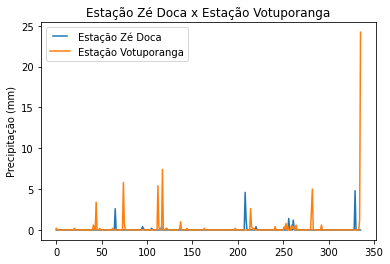

In [33]:
from matplotlib.legend_handler import HandlerLine2D
df002['CHUVA'] = df002['CHUVA'].astype('float')
df003['CHUVA'] = df003['CHUVA'].astype('float')
fig, ax = plt.subplots()
line1, = ax.plot(df002['CHUVA'], label='Estação Zé Doca')
line2, = ax.plot(df003['CHUVA'], label='Estação Votuporanga')
plt.ylabel('Precipitação (mm)')
plt.title('Estação Zé Doca x Estação Votuporanga')

ax.legend(handler_map={line1: HandlerLine2D(numpoints=4)})